In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [10]:
plt.rcParams['figure.figsize'] = (9, 12)

In [11]:
vidL = cv2.VideoCapture('Videos/left.mp4')
vidR = cv2.VideoCapture('Videos/right.mp4')

In [12]:
if (vidL.isOpened()==False or vidR.isOpened() == False):
    print("Error opening video stream or file")

In [13]:
frame_width = int(vidR.get(3))
frame_height = int(vidL.get(4))

In [14]:
fourcc = cv2.VideoWriter_fourcc(*'X264')
out = cv2.VideoWriter('depthMap.mp4', fourcc, 30, (frame_width,frame_height))

In [15]:
i=0

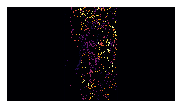

In [8]:
while(vidL.isOpened() and vidR.isOpened()):
    
    # Capture frame-by-frame
    retL, frameL = vidL.read()
    retR, frameR = vidR.read()
    
    if (retL and retR):
        
        gray_frameL = cv2.cvtColor(frameL, cv2.COLOR_BGR2GRAY)
        gray_frameR = cv2.cvtColor(frameR, cv2.COLOR_BGR2GRAY)
        
        
        stereo = cv2.StereoBM_create(numDisparities=128, blockSize=9)
        disparity = stereo.compute(gray_frameL, gray_frameR)
        #out.write(disparity)
        # Display the resulting frame
        # plt.imshow(frame, 'gray')
        plt.axis('off')
        plt.imshow(disparity, 'inferno')
        image_name = f'depthmap_{i}.png'
        i = i+1
        plt.savefig(f'depth_folder_1/{image_name}')
        
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Break the loop
    else: 
        break

In [9]:
vidL.release()
vidR.release()
out.release()